In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

C:\Users\GEDELA LEELA PRASAD\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of X: (70000, 784)
Shape of y: (70000,)


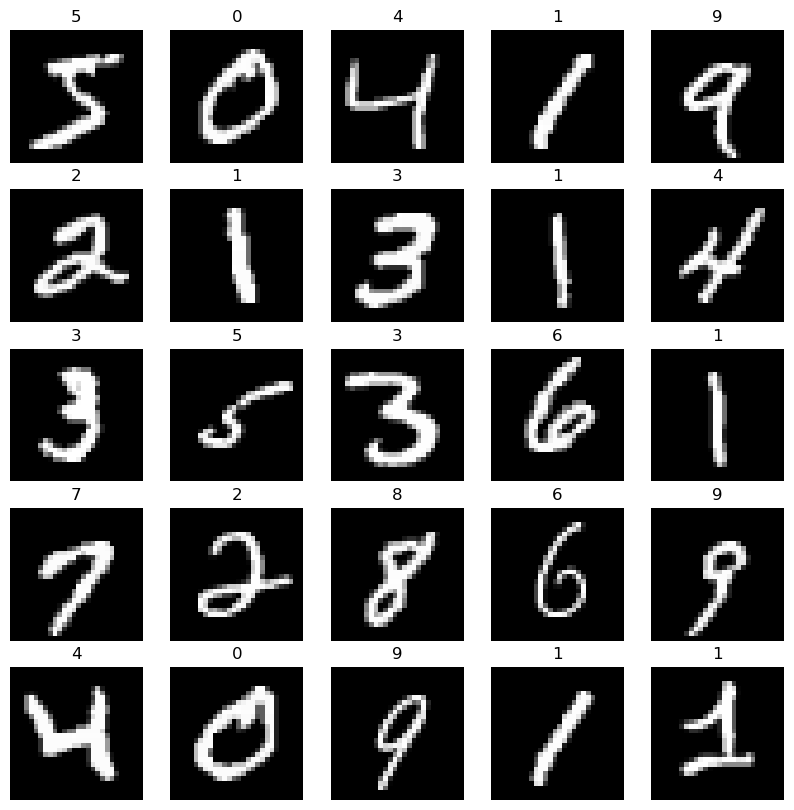

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(y[i])
    plt.axis("off")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [6]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1286    1   11    0    1   11   21    4    6    2]
 [   0 1556    7   10    3    6    1    4   11    2]
 [   6   19 1233   18   13   13   20   18   29   11]
 [   7    9   37 1272    1   39    7   22   19   20]
 [   5    2   11    4 1189    5   12    9    9   49]
 [  12    9   10   42   12 1114   20    2   36   16]
 [   7    5   18    1   17   21 1319    3    5    0]
 [   4    4   22    5   13    6    0 1415    2   32]
 [  11   31   16   41    5   44   13    9 1166   21]
 [   6    9    6   15   36    5    0   51   12 1280]]
Accuracy: 0.9164285714285715


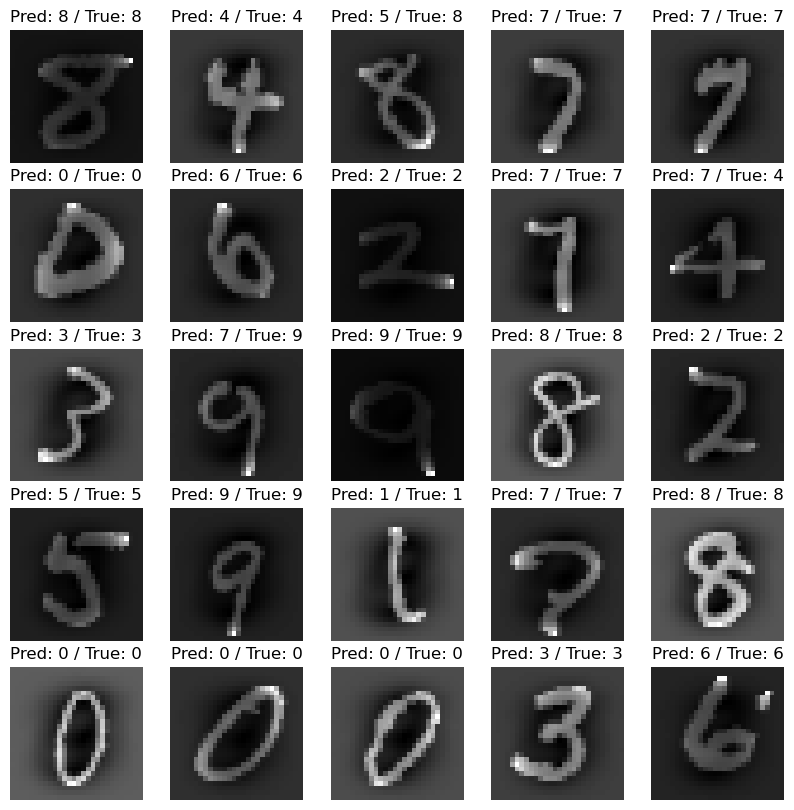

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {y_pred[i]} / True: {y_test.iloc[i]}")
    plt.axis("off")
plt.show()